## 1. Data Wrangling  with pandasql

In [3]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from pandasql import sqldf
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [15]:
file_path1 = r"C:\Users\abdel\Downloads\books_data.csv\books_data.csv"
file_path2 = r"C:\Users\abdel\Downloads\BigData_Project\Sales_Data\Books_rating.csv"
books_data = pd.read_csv(file_path1)
books_rating = pd.read_csv(file_path2)

In [16]:
print(books_data.columns)
print(books_rating.columns)

Index(['Title', 'description', 'authors', 'image', 'previewLink', 'publisher',
       'publishedDate', 'infoLink', 'categories', 'ratingsCount'],
      dtype='object')
Index(['Id', 'Title', 'Price', 'User_id', 'profileName', 'review/helpfulness',
       'review/score', 'review/time', 'review/summary', 'review/text'],
      dtype='object')


In [17]:
# Removing unnecessary columns for the analysis
bd = books_data.drop(["description", "image", "previewLink", "publisher", "infoLink", "ratingsCount"], axis = 1)
br = books_rating.drop(["profileName","review/time", "review/helpfulness", "review/summary", "review/text", "User_id"], axis = 1)

print(bd.columns)
print(br.columns)

Index(['Title', 'authors', 'publishedDate', 'categories'], dtype='object')
Index(['Id', 'Title', 'Price', 'review/score'], dtype='object')


In [18]:
# Books data dataset
sqldf("SELECT * FROM bd LIMIT 10")

Title  \
0                     Its Only Art If Its Well Hung!   
1                           Dr. Seuss: American Icon   
2              Wonderful Worship in Smaller Churches   
3                      Whispers of the Wicked Saints   
4  Nation Dance: Religion, Identity and Cultural ...   
5  The Church of Christ: A Biblical Ecclesiology ...   
6                         The Overbury affair (Avon)   
7            A Walk in the Woods: a Play in Two Acts   
8                           Saint Hyacinth of Poland   
9  Rising Sons and Daughters: Life Among Japan's ...   

                    authors publishedDate                     categories  
0          ['Julie Strain']          1996    ['Comics & Graphic Novels']  
1            ['Philip Nel']    2005-01-01  ['Biography & Autobiography']  
2          ['David R. Ray']          2000                   ['Religion']  
3       ['Veronica Haddon']       2005-02                    ['Fiction']  
4           ['Edward Long']    2003-03-01                           None  
5      ['Everett Ferguson']          1996                   ['Religion']  
6  ['Miriam Allen De Ford']          1960                           None  
7          ['Lee Blessing']          1988                           None  
8  ['Mary Fabyan Windeatt']    2009-01-01  ['Biography & Autobiography']  
9        ['Steven Wardell']          1995             ['Social Science']

In [20]:
# Books reviews dataset
sqldf("SELECT * FROM br LIMIT 10")

Id                           Title Price  review/score
0  1882931173  Its Only Art If Its Well Hung!  None           4.0
1  0826414346        Dr. Seuss: American Icon  None           5.0
2  0826414346        Dr. Seuss: American Icon  None           5.0
3  0826414346        Dr. Seuss: American Icon  None           4.0
4  0826414346        Dr. Seuss: American Icon  None           4.0
5  0826414346        Dr. Seuss: American Icon  None           4.0
6  0826414346        Dr. Seuss: American Icon  None           5.0
7  0826414346        Dr. Seuss: American Icon  None           5.0
8  0826414346        Dr. Seuss: American Icon  None           5.0
9  0826414346        Dr. Seuss: American Icon  None           4.0

In [22]:
# Renaming review column
br.rename(columns = {'review/score':'review'}, inplace = True)
print(br.columns)

Index(['Id', 'Title', 'Price', 'review'], dtype='object')


In [23]:
# Aggregating the price and review columns by the Id of the book
br_2 = sqldf("""SELECT Id, Title, AVG(Price) AS PRICE, AVG(review) AS REVIEW, Count(review) AS N_OF_REVIEWS 
                FROM br 
                GROUP BY Id""")

sqldf("SELECT * FROM br_2 LIMIT 15")

Id                                              Title PRICE  \
0   0001047604                                       Aurora Leigh  None   
1   0001047655                              The Prodigal Daughter  None   
2   0001047736                                Summer of the Danes  None   
3   0001047825                                Potters Field Audio  None   
4   0001047876                             Life of Samuel Johnson  None   
5   0001048228                                    Pale Battalions  None   
6   0001049143  The Poems & Songs of Robert Burns (HarperColli...  None   
7   0001050079               Copperhead (The Starbuck Chronicles)  None   
8   0001050087                  Battle Flag (Starbuck Chronicles)  None   
9   0001050184                 Not a Penny More, Not a Penny Less  None   
10  0001052888                             Hermit of Eyton Forest  None   
11  0001052934                                       Regeneration  None   
12  0001052950                                  Mauritius Command  None   
13  0001053744                                Pearl and Sir Orfeo  None   
14  0001054090                                      Beyond Recall  None   

      REVIEW  N_OF_REVIEWS  
0   3.000000             4  
1   3.716216            74  
2   3.500000            12  
3   3.857143            14  
4   4.000000             8  
5   4.333333            33  
6   4.363636            11  
7   4.153846            26  
8   3.964286            28  
9   4.268116           138  
10  4.307692            13  
11  4.700000            10  
12  4.530612            49  
13  5.000000             1  
14  4.318182            22

In [25]:
# Creating prefix to merge dataframes
bd_p = bd.add_prefix("bd_")
br_p = br_2.add_prefix("br_")

In [26]:
# Merge Dataframes
df = sqldf(""" SELECT bd_p.*, br_p.*
          FROM bd_p, br_p 
          WHERE bd_p.bd_Title = br_p.br_Title""")
df

bd_Title  \
0                          Its Only Art If Its Well Hung!   
1                                Dr. Seuss: American Icon   
2                   Wonderful Worship in Smaller Churches   
3                           Whispers of the Wicked Saints   
4       Nation Dance: Religion, Identity and Cultural ...   
...                                                   ...   
221984  The Orphan Of Ellis Island (Time Travel Advent...   
221985                            Red Boots for Christmas   
221986                                              Mamaw   
221987                                  The Autograph Man   
221988  Student's Solutions Manual for Johnson/Mowry's...   

                                     bd_authors bd_publishedDate  \
0                              ['Julie Strain']             1996   
1                                ['Philip Nel']       2005-01-01   
2                              ['David R. Ray']             2000   
3                           ['Veronica Haddon']          2005-02   
4                               ['Edward Long']       2003-03-01   
...                                         ...              ...   
221984                      ['Elvira Woodruff']       2000-06-01   
221985                                     None             1995   
221986                    ['Wild Wild Cabbage']       2018-01-17   
221987                          ['Zadie Smith']       2003-08-12   
221988  ['David B. Johnson', 'Thomas A. Mowry']       1998-01-01   

                        bd_categories       br_Id  \
0         ['Comics & Graphic Novels']  1882931173   
1       ['Biography & Autobiography']  0826414346   
2                        ['Religion']  0829814000   
3                         ['Fiction']  0595344550   
4                                None  0253338352   
...                               ...         ...   
221984           ['Juvenile Fiction']  0590482467   
221985           ['Juvenile Fiction']  0570047870   
221986                           None  B000OVF7JY   
221987                    ['Fiction']  1402508735   
221988                           None  0534400604   

                                                 br_Title  br_PRICE  \
0                          Its Only Art If Its Well Hung!       NaN   
1                                Dr. Seuss: American Icon       NaN   
2                   Wonderful Worship in Smaller Churches     19.40   
3                           Whispers of the Wicked Saints     10.95   
4       Nation Dance: Religion, Identity and Cultural ...     39.95   
...                                                   ...       ...   
221984  The Orphan Of Ellis Island (Time Travel Advent...      3.32   
221985                            Red Boots for Christmas       NaN   
221986                                              Mamaw       NaN   
221987                                  The Autograph Man     34.99   
221988  Student's Solutions Manual for Johnson/Mowry's...       NaN   

        br_REVIEW  br_N_OF_REVIEWS  
0        4.000000                1  
1        4.555556                9  
2        5.000000                4  
3        3.718750               32  
4        5.000000                1  
...           ...              ...  
221984   4.678571               28  
221985   5.000000                2  
221986   4.666667                3  
221987   2.500000                4  
221988   3.250000                4  

[221989 rows x 9 columns]

In [27]:
#Rearranging and deleting duplicated columns
df.columns

Index(['bd_Title', 'bd_authors', 'bd_publishedDate', 'bd_categories', 'br_Id',
       'br_Title', 'br_PRICE', 'br_REVIEW', 'br_N_OF_REVIEWS'],
      dtype='object')

In [28]:
del df["br_Title"]
df

bd_Title  \
0                          Its Only Art If Its Well Hung!   
1                                Dr. Seuss: American Icon   
2                   Wonderful Worship in Smaller Churches   
3                           Whispers of the Wicked Saints   
4       Nation Dance: Religion, Identity and Cultural ...   
...                                                   ...   
221984  The Orphan Of Ellis Island (Time Travel Advent...   
221985                            Red Boots for Christmas   
221986                                              Mamaw   
221987                                  The Autograph Man   
221988  Student's Solutions Manual for Johnson/Mowry's...   

                                     bd_authors bd_publishedDate  \
0                              ['Julie Strain']             1996   
1                                ['Philip Nel']       2005-01-01   
2                              ['David R. Ray']             2000   
3                           ['Veronica Haddon']          2005-02   
4                               ['Edward Long']       2003-03-01   
...                                         ...              ...   
221984                      ['Elvira Woodruff']       2000-06-01   
221985                                     None             1995   
221986                    ['Wild Wild Cabbage']       2018-01-17   
221987                          ['Zadie Smith']       2003-08-12   
221988  ['David B. Johnson', 'Thomas A. Mowry']       1998-01-01   

                        bd_categories       br_Id  br_PRICE  br_REVIEW  \
0         ['Comics & Graphic Novels']  1882931173       NaN   4.000000   
1       ['Biography & Autobiography']  0826414346       NaN   4.555556   
2                        ['Religion']  0829814000     19.40   5.000000   
3                         ['Fiction']  0595344550     10.95   3.718750   
4                                None  0253338352     39.95   5.000000   
...                               ...         ...       ...        ...   
221984           ['Juvenile Fiction']  0590482467      3.32   4.678571   
221985           ['Juvenile Fiction']  0570047870       NaN   5.000000   
221986                           None  B000OVF7JY       NaN   4.666667   
221987                    ['Fiction']  1402508735     34.99   2.500000   
221988                           None  0534400604       NaN   3.250000   

        br_N_OF_REVIEWS  
0                     1  
1                     9  
2                     4  
3                    32  
4                     1  
...                 ...  
221984               28  
221985                2  
221986                3  
221987                4  
221988                4  

[221989 rows x 8 columns]

In [29]:
# Name of Columns
df.columns

Index(['bd_Title', 'bd_authors', 'bd_publishedDate', 'bd_categories', 'br_Id',
       'br_PRICE', 'br_REVIEW', 'br_N_OF_REVIEWS'],
      dtype='object')

In [30]:
# Renaming Columns
df.columns = ['Title', 'Authors', 'Published_Date', 'Categorie', 'Id', 'Price', 'Review', 'n_Reviews']
df

Title  \
0                          Its Only Art If Its Well Hung!   
1                                Dr. Seuss: American Icon   
2                   Wonderful Worship in Smaller Churches   
3                           Whispers of the Wicked Saints   
4       Nation Dance: Religion, Identity and Cultural ...   
...                                                   ...   
221984  The Orphan Of Ellis Island (Time Travel Advent...   
221985                            Red Boots for Christmas   
221986                                              Mamaw   
221987                                  The Autograph Man   
221988  Student's Solutions Manual for Johnson/Mowry's...   

                                        Authors Published_Date  \
0                              ['Julie Strain']           1996   
1                                ['Philip Nel']     2005-01-01   
2                              ['David R. Ray']           2000   
3                           ['Veronica Haddon']        2005-02   
4                               ['Edward Long']     2003-03-01   
...                                         ...            ...   
221984                      ['Elvira Woodruff']     2000-06-01   
221985                                     None           1995   
221986                    ['Wild Wild Cabbage']     2018-01-17   
221987                          ['Zadie Smith']     2003-08-12   
221988  ['David B. Johnson', 'Thomas A. Mowry']     1998-01-01   

                            Categorie          Id  Price    Review  n_Reviews  
0         ['Comics & Graphic Novels']  1882931173    NaN  4.000000          1  
1       ['Biography & Autobiography']  0826414346    NaN  4.555556          9  
2                        ['Religion']  0829814000  19.40  5.000000          4  
3                         ['Fiction']  0595344550  10.95  3.718750         32  
4                                None  0253338352  39.95  5.000000          1  
...                               ...         ...    ...       ...        ...  
221984           ['Juvenile Fiction']  0590482467   3.32  4.678571         28  
221985           ['Juvenile Fiction']  0570047870    NaN  5.000000          2  
221986                           None  B000OVF7JY    NaN  4.666667          3  
221987                    ['Fiction']  1402508735  34.99  2.500000          4  
221988                           None  0534400604    NaN  3.250000          4  

[221989 rows x 8 columns]

In [31]:
# Rearranging Columns
df = df[['Id', 'Title', 'Authors', 'Published_Date', 'Categorie', 'Price', 'Review', 'n_Reviews']]
df

Id                                              Title  \
0       1882931173                     Its Only Art If Its Well Hung!   
1       0826414346                           Dr. Seuss: American Icon   
2       0829814000              Wonderful Worship in Smaller Churches   
3       0595344550                      Whispers of the Wicked Saints   
4       0253338352  Nation Dance: Religion, Identity and Cultural ...   
...            ...                                                ...   
221984  0590482467  The Orphan Of Ellis Island (Time Travel Advent...   
221985  0570047870                            Red Boots for Christmas   
221986  B000OVF7JY                                              Mamaw   
221987  1402508735                                  The Autograph Man   
221988  0534400604  Student's Solutions Manual for Johnson/Mowry's...   

                                        Authors Published_Date  \
0                              ['Julie Strain']           1996   
1                                ['Philip Nel']     2005-01-01   
2                              ['David R. Ray']           2000   
3                           ['Veronica Haddon']        2005-02   
4                               ['Edward Long']     2003-03-01   
...                                         ...            ...   
221984                      ['Elvira Woodruff']     2000-06-01   
221985                                     None           1995   
221986                    ['Wild Wild Cabbage']     2018-01-17   
221987                          ['Zadie Smith']     2003-08-12   
221988  ['David B. Johnson', 'Thomas A. Mowry']     1998-01-01   

                            Categorie  Price    Review  n_Reviews  
0         ['Comics & Graphic Novels']    NaN  4.000000          1  
1       ['Biography & Autobiography']    NaN  4.555556          9  
2                        ['Religion']  19.40  5.000000          4  
3                         ['Fiction']  10.95  3.718750         32  
4                                None  39.95  5.000000          1  
...                               ...    ...       ...        ...  
221984           ['Juvenile Fiction']   3.32  4.678571         28  
221985           ['Juvenile Fiction']    NaN  5.000000          2  
221986                           None    NaN  4.666667          3  
221987                    ['Fiction']  34.99  2.500000          4  
221988                           None    NaN  3.250000          4  

[221989 rows x 8 columns]


>#### Removing Nan/None Values.

In [32]:
# Removing Nan/None Values
df.dropna(inplace=True)

>#### In order to analyse only the books with more relevance, only the books with at least 5 reviews will be considered.

In [33]:
# Filtering the columns with at least 5 reviews
df = sqldf("""  SELECT * 
                FROM df 
                WHERE n_Reviews >= 5""")
df

Id                                              Title  \
0      0595344550                      Whispers of the Wicked Saints   
1      0918973031                        Dramatica for Screenwriters   
2      0792391810  Vector Quantization and Signal Compression (Th...   
3      0974289108  The Ultimate Guide to Law School Admission: In...   
4      0781810698   Beginner's Yoruba (Hippocrene Beginner's Series)   
...           ...                                                ...   
16414  0875802796  In the First Line of Battle: The 12th Illinois...   
16415  1582461031                             Petit Connoisseur: Art   
16416  0679783334  The Awakening and Selected Stories (Modern Lib...   
16417  0971556504  The Magic of the Soul: Applying Spiritual Powe...   
16418  0590482467  The Orphan Of Ellis Island (Time Travel Advent...   

                                  Authors Published_Date  \
0                     ['Veronica Haddon']        2005-02   
1                ['Armando Salda A-Mora']        2005-07   
2      ['Allen Gersho', 'Robert M. Gray']     2012-12-06   
3                        ['Fiona Cownie']     2010-01-28   
4                 ['Kayode J. Fakinlede']           2005   
...                                   ...            ...   
16414             ['Samuel M. Blackwell']           2002   
16415                ['Karen Salmansohn']           2003   
16416                     ['Kate Chopin']           2003   
16417              ['Patrick J. Harbula']     2002-09-01   
16418                 ['Elvira Woodruff']     2000-06-01   

                          Categorie  Price    Review  n_Reviews  
0                       ['Fiction']  10.95  3.718750         32  
1                     ['Reference']  17.95  4.700000         10  
2      ['Technology & Engineering']  76.94  4.400000          5  
3                           ['Law']  14.95  3.571429          7  
4        ['Foreign Language Study']  19.77  3.800000          5  
...                             ...    ...       ...        ...  
16414                   ['History']  38.50  4.600000          5  
16415       ['Juvenile Nonfiction']   6.99  4.142857          7  
16416                  ['Adultery']   9.00  3.000000          7  
16417       ['Body, Mind & Spirit']  18.95  4.882353         17  
16418          ['Juvenile Fiction']   3.32  4.678571         28  

[16419 rows x 8 columns]

In [34]:
# Taking only the year as the book's published date
df['Year'] = df['Published_Date'].str[:4]

# Removing Published_Date column 
df = df[['Id', 'Title', 'Authors', 'Year', 'Categorie', 'Price', 'Review', 'n_Reviews']]
df

Id                                              Title  \
0      0595344550                      Whispers of the Wicked Saints   
1      0918973031                        Dramatica for Screenwriters   
2      0792391810  Vector Quantization and Signal Compression (Th...   
3      0974289108  The Ultimate Guide to Law School Admission: In...   
4      0781810698   Beginner's Yoruba (Hippocrene Beginner's Series)   
...           ...                                                ...   
16414  0875802796  In the First Line of Battle: The 12th Illinois...   
16415  1582461031                             Petit Connoisseur: Art   
16416  0679783334  The Awakening and Selected Stories (Modern Lib...   
16417  0971556504  The Magic of the Soul: Applying Spiritual Powe...   
16418  0590482467  The Orphan Of Ellis Island (Time Travel Advent...   

                                  Authors  Year                     Categorie  \
0                     ['Veronica Haddon']  2005                   ['Fiction']   
1                ['Armando Salda A-Mora']  2005                 ['Reference']   
2      ['Allen Gersho', 'Robert M. Gray']  2012  ['Technology & Engineering']   
3                        ['Fiona Cownie']  2010                       ['Law']   
4                 ['Kayode J. Fakinlede']  2005    ['Foreign Language Study']   
...                                   ...   ...                           ...   
16414             ['Samuel M. Blackwell']  2002                   ['History']   
16415                ['Karen Salmansohn']  2003       ['Juvenile Nonfiction']   
16416                     ['Kate Chopin']  2003                  ['Adultery']   
16417              ['Patrick J. Harbula']  2002       ['Body, Mind & Spirit']   
16418                 ['Elvira Woodruff']  2000          ['Juvenile Fiction']   

       Price    Review  n_Reviews  
0      10.95  3.718750         32  
1      17.95  4.700000         10  
2      76.94  4.400000          5  
3      14.95  3.571429          7  
4      19.77  3.800000          5  
...      ...       ...        ...  
16414  38.50  4.600000          5  
16415   6.99  4.142857          7  
16416   9.00  3.000000          7  
16417  18.95  4.882353         17  
16418   3.32  4.678571         28  

[16419 rows x 8 columns]

In [35]:
# Analysing the Unique Values of Column Year
np.sort(df['Year'].unique())

array(['1722', '1802', '1817', '1822', '1823', '1843', '1852', '1853',
       '1863', '1870', '1871', '1872', '1875', '1877', '1878', '1883',
       '1884', '1885', '1887', '1888', '1889', '1891', '1894', '1895',
       '1897', '1900', '1901', '1903', '1904', '1906', '1907', '1908',
       '1909', '1910', '1912', '1913', '1914', '1915', '1916', '1918',
       '1919', '1920', '1921', '1922', '1925', '1926', '1927', '1929',
       '1930', '1937', '1940', '1941', '1942', '1943', '1945', '1946',
       '1947', '1948', '1949', '1950', '1952', '1953', '1954', '1955',
       '1956', '1957', '1958', '1959', '1960', '1961', '1962', '1963',
       '1964', '1965', '1966', '1967', '1968', '1969', '196?', '1970',
       '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994',
       '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002',
      

##is an accessor that allows you to access a group of rows and columns by labels or a boolean array.
The provided code filters the DataFrame df to return only the rows where the 'Year' column contains a question mark ?
. This can be useful for identifying and handling rows with uncertain or problematic year data.

In [36]:
# Ocurrencies of ? in the year column
df.loc[df['Year'].str.contains("[?]",case=False)]

Id                     Title               Authors  Year  \
10144  1592248810                The Damned      ['Charles Fort']  196?   
11172  0977103102  Bagpipe Maintenance Book  ['Michael Hamilton']  200?   

         Categorie  Price    Review  n_Reviews  
10144  ['Science']  13.95  3.500000          6  
11172  ['Bagpipe']   8.00  3.666667          6

>#### There are ocurrencies of '?' in the year column, so it will be replaced by the number 5

In [39]:
import pandas as pd



# Convert 'Year' column to string type to safely use .str accessor
df['Year'] = df['Year'].astype(str)

# Replace '?' with '5'
df['Year'] = df['Year'].str.replace('?', '5', regex=False)

# Handling NaN values if present
df['Year'] = df['Year'].replace('nan', None)

# Convert 'Year' column back to integer type, if required
df['Year'] = df['Year'].astype(float).astype('Int64')  # Using Int64 to handle missing values

print(df)


               Id                                              Title  \
0      0595344550                      Whispers of the Wicked Saints   
1      0918973031                        Dramatica for Screenwriters   
2      0792391810  Vector Quantization and Signal Compression (Th...   
3      0974289108  The Ultimate Guide to Law School Admission: In...   
4      0781810698   Beginner's Yoruba (Hippocrene Beginner's Series)   
...           ...                                                ...   
16414  0875802796  In the First Line of Battle: The 12th Illinois...   
16415  1582461031                             Petit Connoisseur: Art   
16416  0679783334  The Awakening and Selected Stories (Modern Lib...   
16417  0971556504  The Magic of the Soul: Applying Spiritual Powe...   
16418  0590482467  The Orphan Of Ellis Island (Time Travel Advent...   

                                  Authors  Year                     Categorie  \
0                     ['Veronica Haddon']  2005       

In [40]:
np.sort(df['Year'].unique())

array([1722, 1802, 1817, 1822, 1823, 1843, 1852, 1853, 1863, 1870, 1871,
       1872, 1875, 1877, 1878, 1883, 1884, 1885, 1887, 1888, 1889, 1891,
       1894, 1895, 1897, 1900, 1901, 1903, 1904, 1906, 1907, 1908, 1909,
       1910, 1912, 1913, 1914, 1915, 1916, 1918, 1919, 1920, 1921, 1922,
       1925, 1926, 1927, 1929, 1930, 1937, 1940, 1941, 1942, 1943, 1945,
       1946, 1947, 1948, 1949, 1950, 1952, 1953, 1954, 1955, 1956, 1957,
       1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968,
       1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979,
       1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
       1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023,
       2030], dtype=object)

In [41]:
# Books with published date above or equals 2023
df[df['Year']>=2023]

Id                                              Title  \
6896  1400032725  How the Universe Got Its Spots: Diary of a Fin...   
7481  B000HXDKD4  A Wealth of Wisdom: Legendary African American...   
9385  1885061897                    Birds of New Jersey Field Guide   

                                  Authors  Year  \
6896                      ['Janna Levin']  2023   
7481  ['Camille Cosby', 'Rene Poussaint']  2030   
9385                     ['Stan Tekiela']  2023   

                          Categorie  Price    Review  n_Reviews  
6896                    ['Science']  10.24  4.375000         32  
7481  ['Biography & Autobiography']  11.18  4.800000          5  
9385                     ['Nature']  10.58  4.533333         15

### 2. Exploratory Data Analysis

#### Categorie column

In [43]:
df_2 = df

# Convert the Strings in the Categorie Column to list.
df_2["Categorie"] = df_2["Categorie"].apply(eval)
df_2

Id                                              Title  \
0      0595344550                      Whispers of the Wicked Saints   
1      0918973031                        Dramatica for Screenwriters   
2      0792391810  Vector Quantization and Signal Compression (Th...   
3      0974289108  The Ultimate Guide to Law School Admission: In...   
4      0781810698   Beginner's Yoruba (Hippocrene Beginner's Series)   
...           ...                                                ...   
16414  0875802796  In the First Line of Battle: The 12th Illinois...   
16415  1582461031                             Petit Connoisseur: Art   
16416  0679783334  The Awakening and Selected Stories (Modern Lib...   
16417  0971556504  The Magic of the Soul: Applying Spiritual Powe...   
16418  0590482467  The Orphan Of Ellis Island (Time Travel Advent...   

                                  Authors  Year                   Categorie  \
0                     ['Veronica Haddon']  2005                   [Fiction]   
1                ['Armando Salda A-Mora']  2005                 [Reference]   
2      ['Allen Gersho', 'Robert M. Gray']  2012  [Technology & Engineering]   
3                        ['Fiona Cownie']  2010                       [Law]   
4                 ['Kayode J. Fakinlede']  2005    [Foreign Language Study]   
...                                   ...   ...                         ...   
16414             ['Samuel M. Blackwell']  2002                   [History]   
16415                ['Karen Salmansohn']  2003       [Juvenile Nonfiction]   
16416                     ['Kate Chopin']  2003                  [Adultery]   
16417              ['Patrick J. Harbula']  2002       [Body, Mind & Spirit]   
16418                 ['Elvira Woodruff']  2000          [Juvenile Fiction]   

       Price    Review  n_Reviews  
0      10.95  3.718750         32  
1      17.95  4.700000         10  
2      76.94  4.400000          5  
3      14.95  3.571429          7  
4      19.77  3.800000          5  
...      ...       ...        ...  
16414  38.50  4.600000          5  
16415   6.99  4.142857          7  
16416   9.00  3.000000          7  
16417  18.95  4.882353         17  
16418   3.32  4.678571         28  

[16419 rows x 8 columns]

In [44]:
# Max Size of List in the Categorie column
max_cats = 0
for i in range(len(df_2)):
    if len(df_2.loc[i, 'Categorie'])>max_cats:
        max_cats = len(df_2.loc[i, 'Categorie'])
max_cats

1

> There are no books with more than one categorie, so the Categorie column can be modified to string as the code below

In [45]:
df_2['Categorie'] = df_2['Categorie'].apply(''.join)
df_2

Id                                              Title  \
0      0595344550                      Whispers of the Wicked Saints   
1      0918973031                        Dramatica for Screenwriters   
2      0792391810  Vector Quantization and Signal Compression (Th...   
3      0974289108  The Ultimate Guide to Law School Admission: In...   
4      0781810698   Beginner's Yoruba (Hippocrene Beginner's Series)   
...           ...                                                ...   
16414  0875802796  In the First Line of Battle: The 12th Illinois...   
16415  1582461031                             Petit Connoisseur: Art   
16416  0679783334  The Awakening and Selected Stories (Modern Lib...   
16417  0971556504  The Magic of the Soul: Applying Spiritual Powe...   
16418  0590482467  The Orphan Of Ellis Island (Time Travel Advent...   

                                  Authors  Year                 Categorie  \
0                     ['Veronica Haddon']  2005                   Fiction   
1                ['Armando Salda A-Mora']  2005                 Reference   
2      ['Allen Gersho', 'Robert M. Gray']  2012  Technology & Engineering   
3                        ['Fiona Cownie']  2010                       Law   
4                 ['Kayode J. Fakinlede']  2005    Foreign Language Study   
...                                   ...   ...                       ...   
16414             ['Samuel M. Blackwell']  2002                   History   
16415                ['Karen Salmansohn']  2003       Juvenile Nonfiction   
16416                     ['Kate Chopin']  2003                  Adultery   
16417              ['Patrick J. Harbula']  2002       Body, Mind & Spirit   
16418                 ['Elvira Woodruff']  2000          Juvenile Fiction   

       Price    Review  n_Reviews  
0      10.95  3.718750         32  
1      17.95  4.700000         10  
2      76.94  4.400000          5  
3      14.95  3.571429          7  
4      19.77  3.800000          5  
...      ...       ...        ...  
16414  38.50  4.600000          5  
16415   6.99  4.142857          7  
16416   9.00  3.000000          7  
16417  18.95  4.882353         17  
16418   3.32  4.678571         28  

[16419 rows x 8 columns]

In [46]:
# Verifying the categories column
df_2['Categorie'].value_counts()

Categorie
Fiction                       2300
Religion                      1327
Computers                      832
History                        831
Business & Economics           825
                              ... 
High technology industries       1
Thai language                    1
Guinea pigs                      1
Displacement (Psychology)        1
Colombo (Sri Lanka)              1
Name: count, Length: 938, dtype: int64

In [47]:
# Number of unique values
df_2['Categorie'].nunique()

938

> As we can see there are 938 unique categories, so it will be reduced in order to improve the analysis.

In [48]:
# Top 30 Categories in Frequency
cats_30 = sqldf("SELECT Categorie, Count(Categorie) AS n FROM df GROUP BY Categorie ORDER BY n DESC LIMIT 30")
cats_30

Categorie     n
0                       Fiction  2300
1                      Religion  1327
2                     Computers   832
3                       History   831
4          Business & Economics   825
5     Biography & Autobiography   750
6              Juvenile Fiction   731
7              Health & Fitness   441
8           Body, Mind & Spirit   428
9        Family & Relationships   402
10          Juvenile Nonfiction   370
11                        Music   353
12                      Cooking   351
13          Sports & Recreation   317
14               Social Science   313
15                    Education   295
16                    Self-Help   292
17                      Science   250
18                   Psychology   230
19             Crafts & Hobbies   189
20                   Philosophy   187
21            Political Science   184
22       Foreign Language Study   172
23                       Nature   160
24                          Art   158
25                         Pets   152
26  Language Arts & Disciplines   151
27                       Travel   149
28              Performing Arts   147
29                       Poetry   146

In [62]:
import pandas as pd
from pandasql import sqldf

n_books_top30_cats = sqldf("SELECT SUM(n) as total_books_top_30 FROM cats_30", locals())

#Calculate the Total Number of Books
total_books = df.shape[0]

#Calculate the Percentage
total_books_top_30 = n_books_top30_cats['total_books_top_30'].iloc[0]
perc_top_30 = "{:.1%}".format(total_books_top_30 / total_books)

print(f"Total books in top 30 categories: {total_books_top_30}")
print(f"Percentage of books in top 30 categories: {perc_top_30}")


Total books in top 30 categories: 13433
Percentage of books in top 30 categories: 81.8%


> #### 81.8% of the books are in the top 30 categories, so the analysis will be made with only these

In [56]:
# FILTERING THE DATASET 
# Number of books in the 30th most appeared categorie
n_30 = cats_30.iloc[29,1]

# Dateset with only the top 30 Categories
df_top_30 = df_2.groupby("Categorie").filter(lambda x: len(x)>=n_30)
df_top_30.reset_index(inplace=True)
df_top_30

index          Id                                              Title  \
0          0  0595344550                      Whispers of the Wicked Saints   
1          4  0781810698   Beginner's Yoruba (Hippocrene Beginner's Series)   
2          6  1861081162                                 Pyrography Designs   
3         10  0394717953                 America at 1750: A Social Portrait   
4         11  1930429487  How to Discipline Kids without Losing Their Lo...   
...      ...         ...                                                ...   
13428  16413  1878257447  Watercolor: For the Artistically Undiscovered ...   
13429  16414  0875802796  In the First Line of Battle: The 12th Illinois...   
13430  16415  1582461031                             Petit Connoisseur: Art   
13431  16417  0971556504  The Magic of the Soul: Applying Spiritual Powe...   
13432  16418  0590482467  The Orphan Of Ellis Island (Time Travel Advent...   

                                Authors  Year               Categorie  Price  \
0                   ['Veronica Haddon']  2005                 Fiction  10.95   
1               ['Kayode J. Fakinlede']  2005  Foreign Language Study  19.77   
2                       ['Sue Walters']  2014                     Art  13.19   
3                ['Richard Hofstadter']  1973                 History   9.62   
4                           ['Jim Fay']  2004  Family & Relationships  10.17   
...                                 ...   ...                     ...    ...   
13428  ['Thacher Hurd', 'John Cassidy']  2017                     Art  19.95   
13429           ['Samuel M. Blackwell']  2002                 History  38.50   
13430              ['Karen Salmansohn']  2003     Juvenile Nonfiction   6.99   
13431            ['Patrick J. Harbula']  2002     Body, Mind & Spirit  18.95   
13432               ['Elvira Woodruff']  2000        Juvenile Fiction   3.32   

         Review  n_Reviews  
0      3.718750         32  
1      3.800000          5  
2      4.250000          8  
3      3.777778          9  
4      4.882353         17  
...         ...        ...  
13428  4.588235         17  
13429  4.600000          5  
13430  4.142857          7  
13431  4.882353         17  
13432  4.678571         28  

[13433 rows x 9 columns]

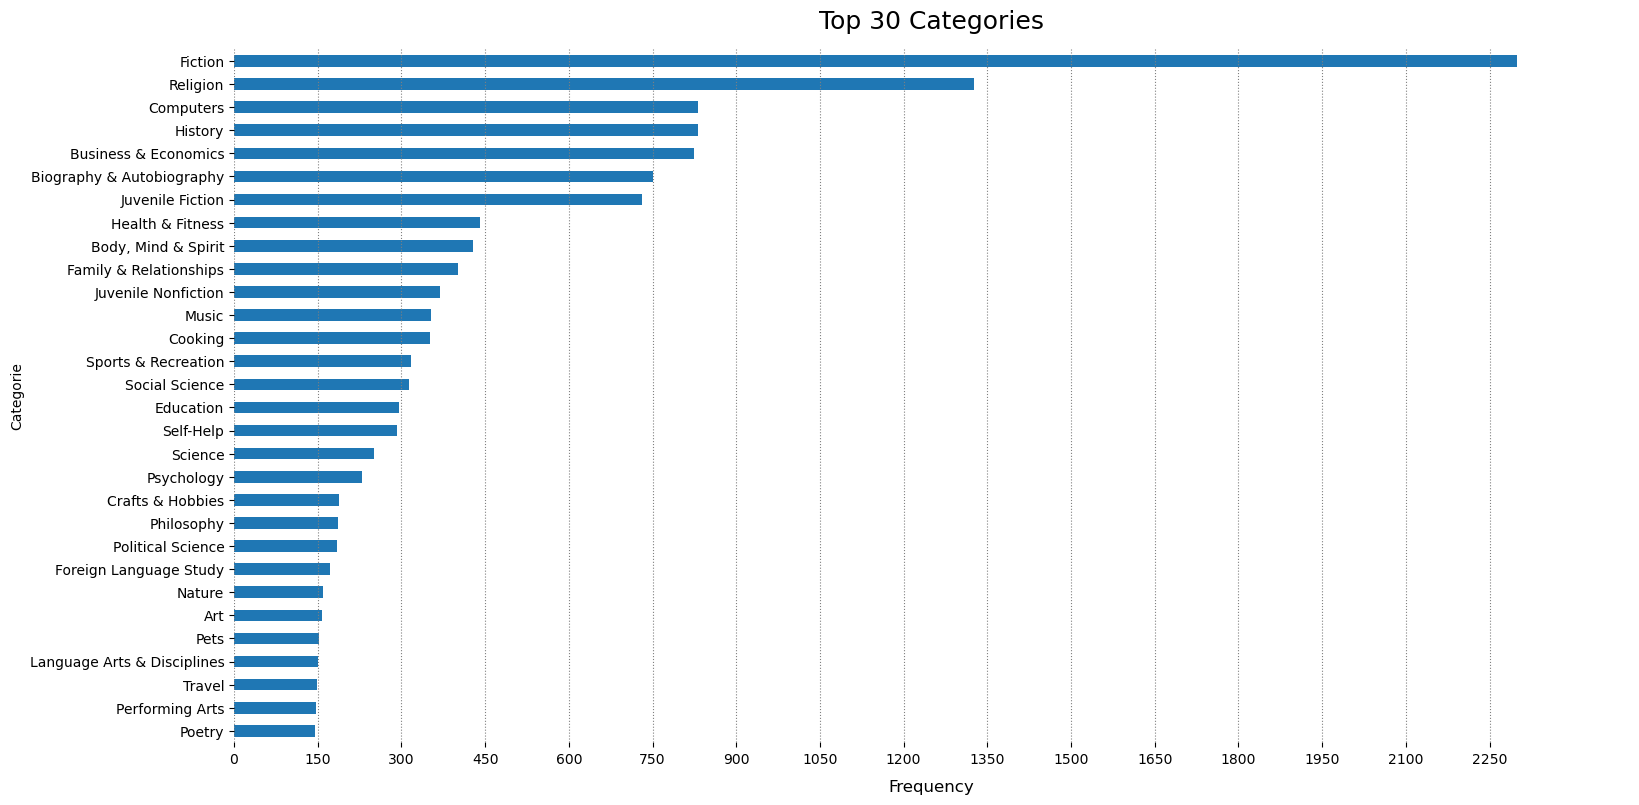

In [57]:
# Barplot with the Top 30 Categories
plt.figure(figsize=(18,9))
df_top_30['Categorie'].value_counts().sort_values().plot.barh()
plt.xlim(0,2500)
plt.grid(axis='x', color='grey', linestyle='dotted', linewidth=0.8)
plt.title("Top 30 Categories", fontdict={'fontsize':18}, pad = 15)
plt.xticks(ticks = (range(0,2400,150)))
plt.xlabel('Frequency',labelpad=10, fontsize=12)
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

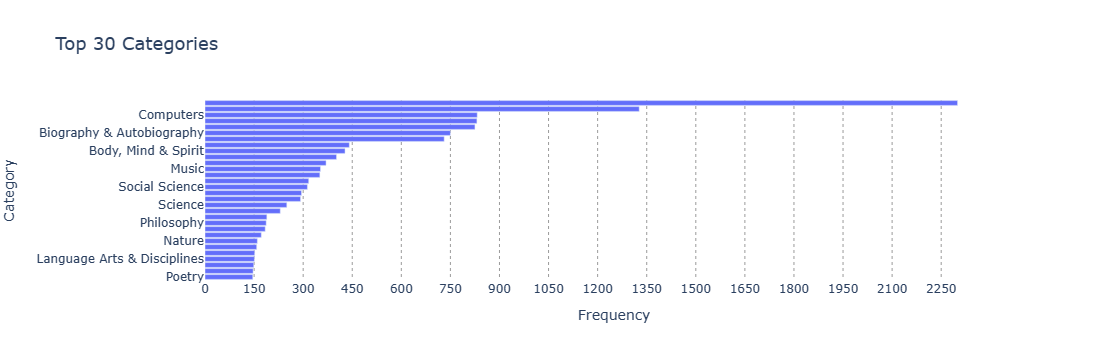

In [63]:
import pandas as pd
import plotly.express as px
# Count the occurrences of each category
category_counts = df_top_30['Categorie'].value_counts().sort_values()

# Create the Plotly horizontal bar plot
fig = px.bar(category_counts,
             orientation='h',
             labels={'index': 'Category', 'value': 'Frequency'},
             title='Top 30 Categories')

# Customize the layout
fig.update_layout(
    xaxis=dict(range=[0, 2500], tickvals=list(range(0, 2400, 150))),
    yaxis=dict(title='Category'),
    xaxis_title='Frequency',
    title=dict(font=dict(size=18), pad=dict(b=15)),
    plot_bgcolor='white',
    showlegend=False
)

# Customize the grid
fig.update_xaxes(showgrid=True, gridwidth=0.8, gridcolor='grey', griddash='dot')

# Customize the spines (axes lines)
fig.update_yaxes(showline=False)
fig.update_xaxes(showline=False)

# Show the plot
fig.show()


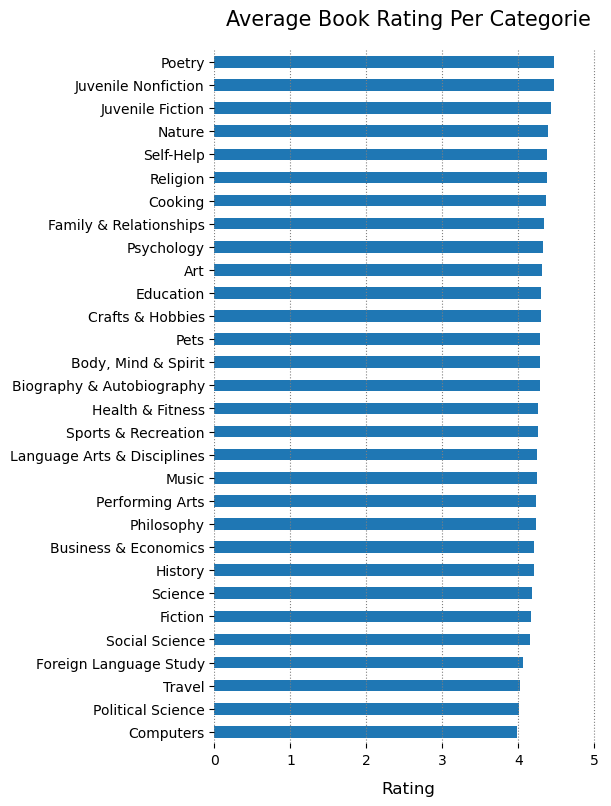

In [58]:
# RATING PER CATEGORIE

# AVERAGE RATING PER CATEGORIE
rat_per_cat = sqldf("SELECT Categorie, AVG(Review) AS rev_avg FROM df_top_30 GROUP BY Categorie ORDER BY rev_avg ASC")

plt.figure(figsize=(5,9))
rat_per_cat['rev_avg'].plot.barh()
plt.xlim(0,5.1)
plt.grid(axis='x', color='grey', linestyle='dotted', linewidth=0.8)
plt.xticks(ticks=range(0,6,1))
plt.xlabel('Rating',labelpad=10, fontsize=12)
plt.yticks(range(len(rat_per_cat['Categorie'])),rat_per_cat['Categorie'])
plt.title("Average Book Rating Per Categorie", fontdict={'fontsize':15}, pad=18)
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

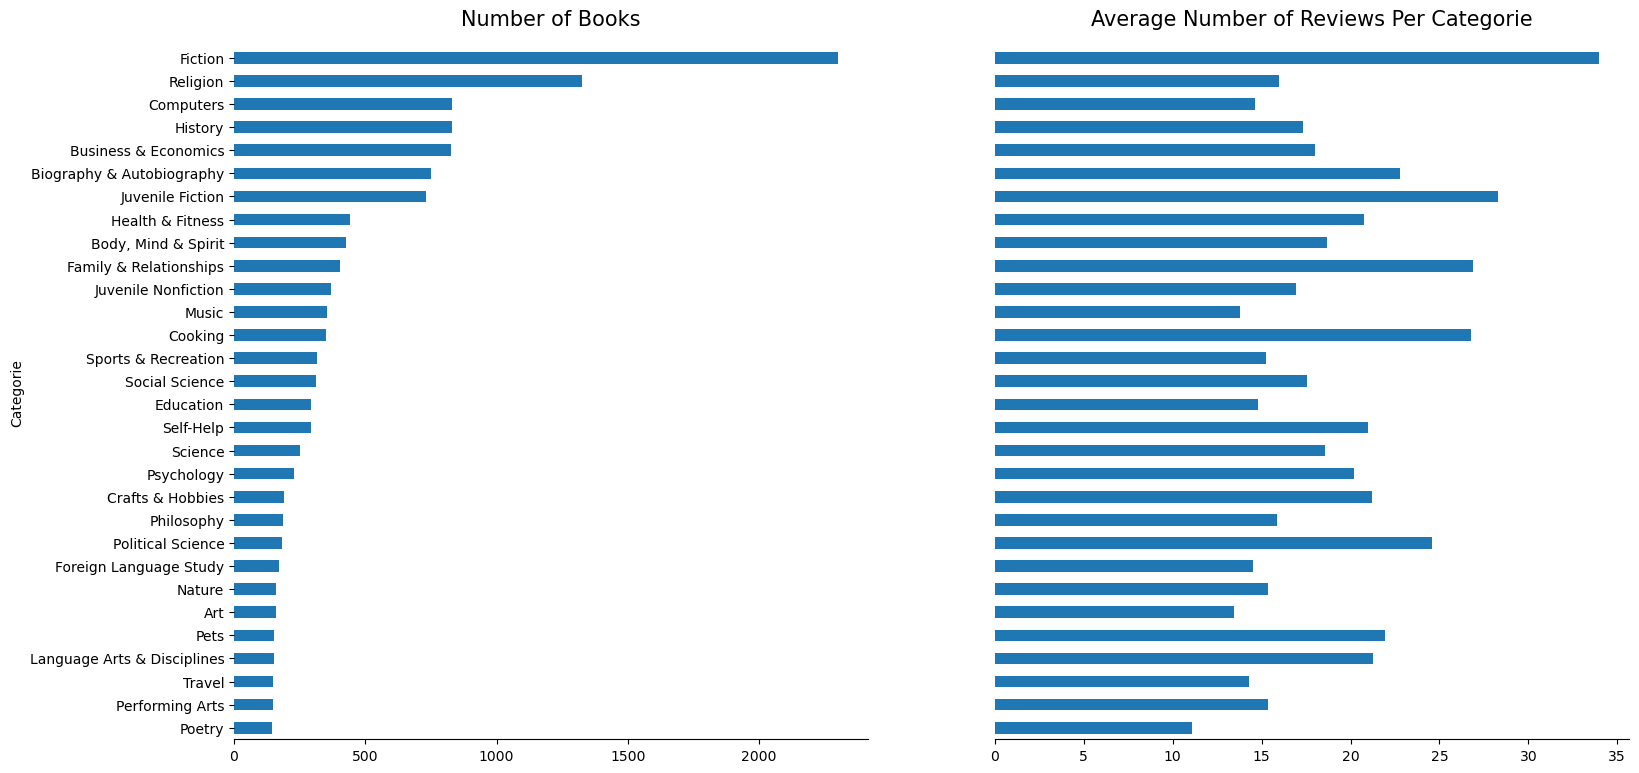

In [59]:
# CATEGORIE X NUMBER OF REVIEWS
# SEPARATE BETWEEN AVG AND TOTAL
df_n_review = sqldf(""" SELECT Categorie, AVG(n_reviews) AS avg_n_reviews, SUM(n_reviews) AS n_reviews,
                        COUNT(Categorie) AS n_books FROM df_top_30
                        GROUP BY Categorie ORDER BY n_books ASC""")

fig = plt.figure(figsize=(18, 9))

ax1 = fig.add_subplot(121)
df_top_30['Categorie'].value_counts().sort_values().plot.barh()
ax1.set_title('Number of Books', fontdict={'fontsize':15}, pad=15)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_visible(False)

ax2 = fig.add_subplot(122)
df_n_review['avg_n_reviews'].plot.barh()
ax2.get_yaxis().set_visible(False)
ax2.set_title('Average Number of Reviews Per Categorie', fontdict={'fontsize':15}, pad=15)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['left'].set_visible(False)

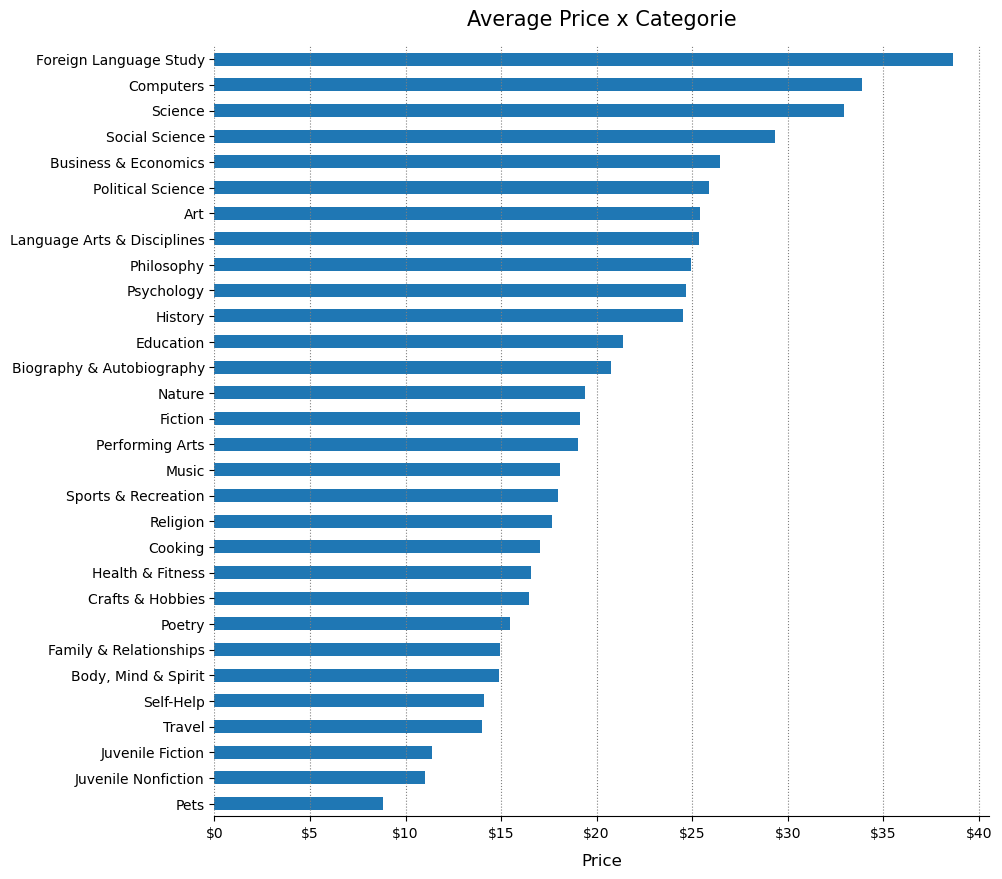

In [60]:
# PRICING PER CATEGORIE
avg_price_p_cat = sqldf("""SELECT Categorie, AVG(Price) AS avg_price FROM df_top_30 GROUP BY Categorie
                           ORDER BY avg_price ASC""")

fig = plt.figure(figsize=(10,10))

avg_price_p_cat['avg_price'].plot.barh()

plt.yticks(range(len(avg_price_p_cat['Categorie'])), avg_price_p_cat['Categorie'])
plt.grid(axis='x', color='grey', linestyle='dotted', linewidth=0.8)
plt.title('Average Price x Categorie', fontdict={'fontsize':15}, pad=15)
plt.xlabel('Price', fontsize=12, labelpad=10)


ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.xaxis.set_major_formatter('${x:1.0f}')

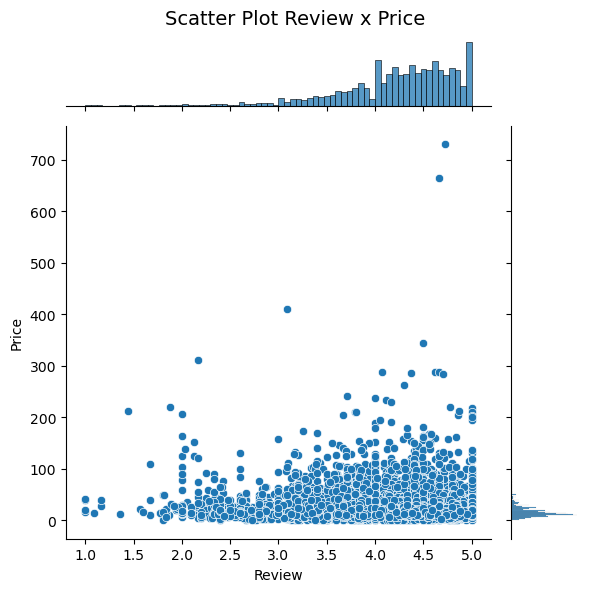

In [61]:
# SCATTER PLOT PRICE X REVIEW
p = sns.jointplot(x='Review', y='Price', data=df_top_30)
p.fig.suptitle("Scatter Plot Review x Price", fontsize=14)
p.fig.tight_layout()
p.fig.subplots_adjust(top=0.93)

[Text(0.5, 1.0, 'Review Distribution')]

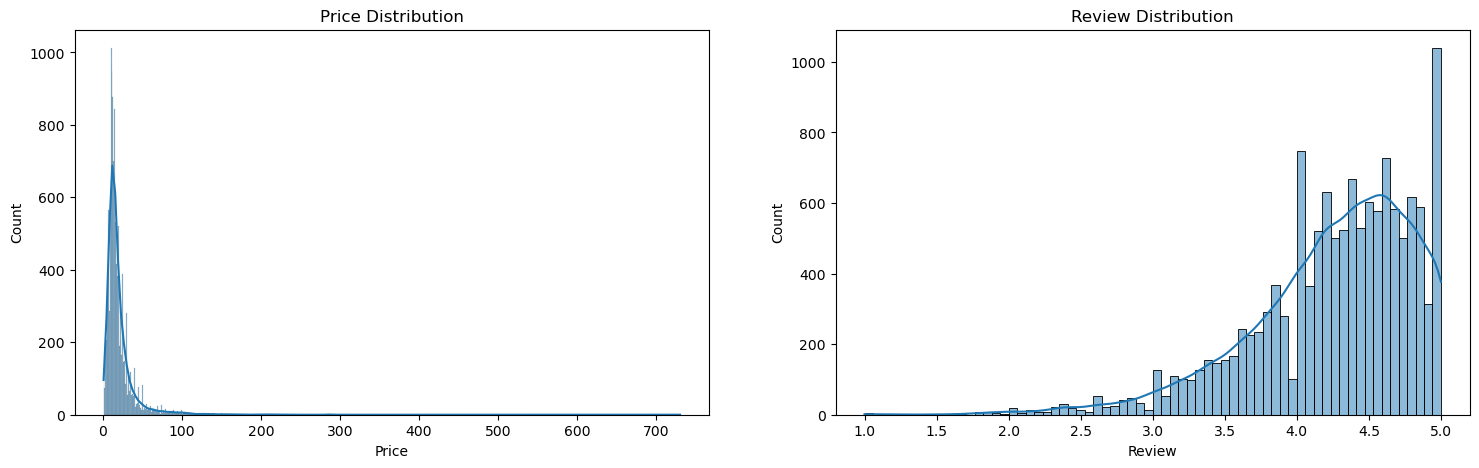

In [64]:
# Distribution of Price and  Review
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
sns.histplot(df_top_30['Price'], kde=True).set(title='Price Distribution')
plt.subplot(1,2,2)
sns.histplot(df_top_30['Review'], kde= True).set(title='Review Distribution')


In [65]:
# Correlation between price and review
stats.pearsonr(df_top_30['Price'], df_top_30['Review'])

PearsonRResult(statistic=-0.04998238736871784, pvalue=6.78815798276422e-09)

> ### As we can see there is no correlation between Price and Review.

Text(0.5, 1.0, 'Frequency of Books Per Year')

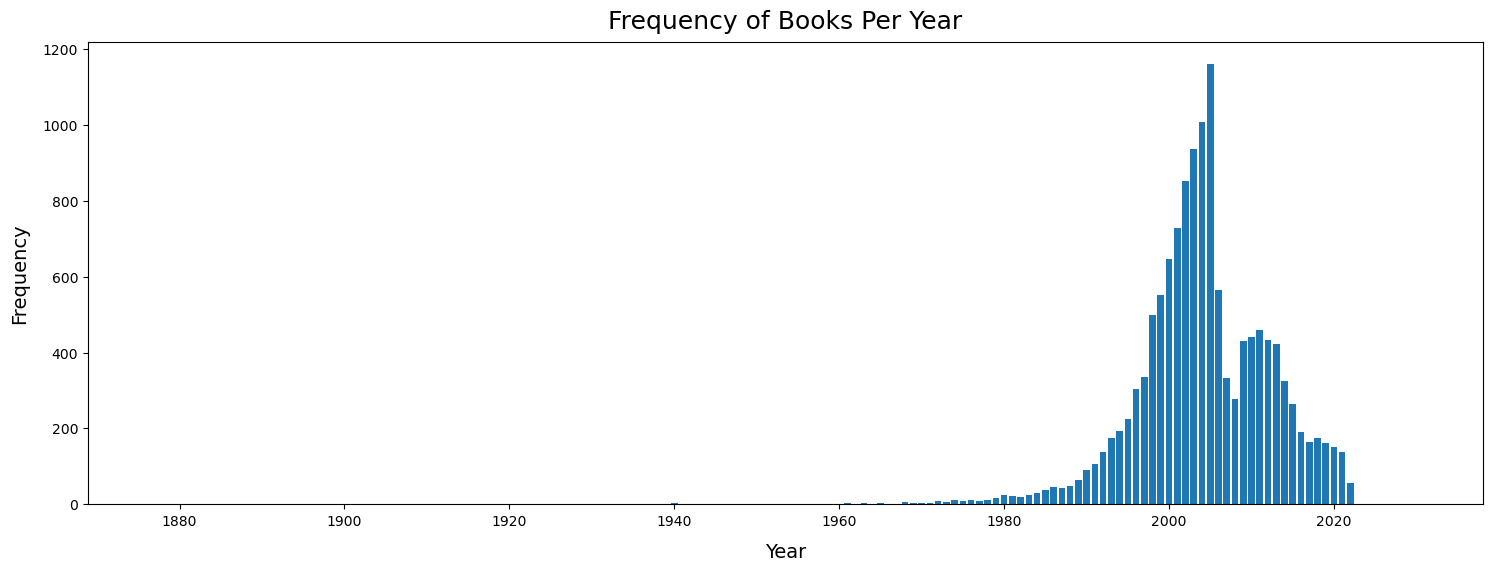

In [67]:
#DATE OF PUBLISHMENT
books_years = sqldf("""SELECT Year, Count(Id) AS n_books, AVG(Price) AS avg_price FROM df_top_30 GROUP BY Year ORDER BY Year DESC""")
fig = plt.figure(figsize=(18,6))
plt.bar(books_years['Year'], books_years['n_books'])
plt.xlabel('Year', labelpad=10,fontsize=14)
plt.ylabel('Frequency', labelpad=10,fontsize=14)
plt.title('Frequency of Books Per Year', fontdict={'fontsize': 18}, pad=10)

(0.0, 750.0)

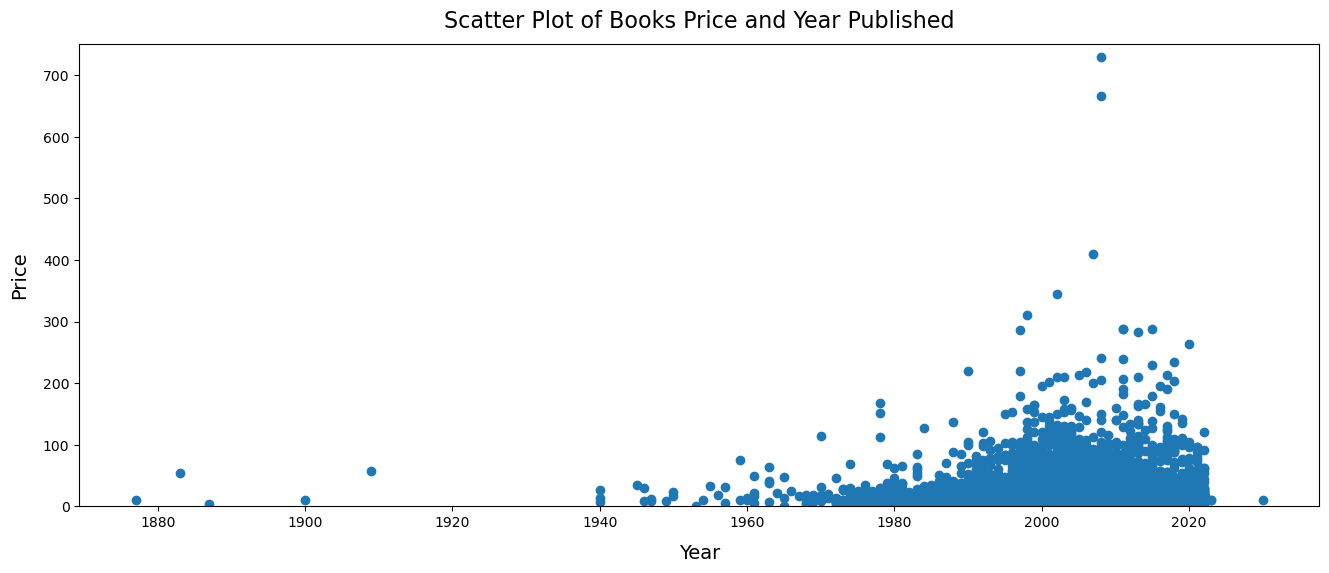

In [68]:
fig = plt.figure(figsize=(16,6))
plt.scatter(df_top_30['Year'], df_top_30['Price'])
plt.xlabel('Year', labelpad=10,fontsize=14)
plt.ylabel('Price', labelpad=10,fontsize=14)
plt.title('Scatter Plot of Books Price and Year Published', fontdict={'fontsize': 16}, pad=12)
plt.ylim([0,750])

>### There are not many books before 1940, so the bar chart of average price for each year will only consider the year 1940 onwards.

Text(0.5, 1.0, 'Year Published x Average Price of Books')

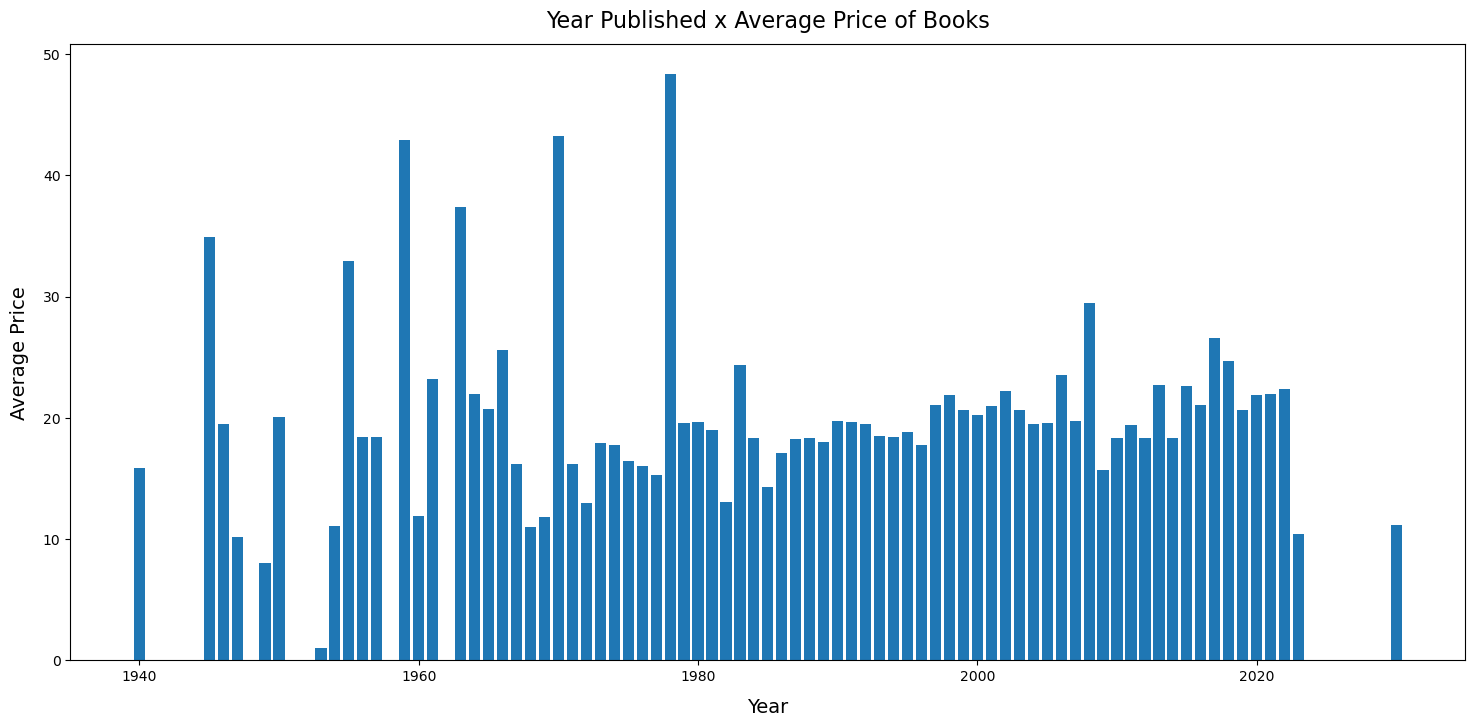

In [69]:
# YEAR OF THE BOOK AND AVERAGE PRICE - SCATTER PLOT
# The years selected for the average were from 1940 onwards
books_years_2 = sqldf(""" SELECT * FROM books_years WHERE Year>=1940""")
fig = plt.figure(figsize=(18,8))
plt.bar(books_years_2['Year'], books_years_2['avg_price'])
plt.xlabel('Year', labelpad=10,fontsize=14)
plt.ylabel('Average Price', labelpad=10,fontsize=14)
plt.title('Year Published x Average Price of Books', fontdict={'fontsize': 16}, pad=12)

In [70]:
# New Dataset to separate the datasets before and after the treatment.
df_top_30_2 = df_top_30

In [71]:
# Apply eval in the author column and transforming the column data in lists
df_top_30_2["Authors"] = df_top_30_2["Authors"].apply(eval)

In [72]:
df_top_30_2

index          Id                                              Title  \
0          0  0595344550                      Whispers of the Wicked Saints   
1          4  0781810698   Beginner's Yoruba (Hippocrene Beginner's Series)   
2          6  1861081162                                 Pyrography Designs   
3         10  0394717953                 America at 1750: A Social Portrait   
4         11  1930429487  How to Discipline Kids without Losing Their Lo...   
...      ...         ...                                                ...   
13428  16413  1878257447  Watercolor: For the Artistically Undiscovered ...   
13429  16414  0875802796  In the First Line of Battle: The 12th Illinois...   
13430  16415  1582461031                             Petit Connoisseur: Art   
13431  16417  0971556504  The Magic of the Soul: Applying Spiritual Powe...   
13432  16418  0590482467  The Orphan Of Ellis Island (Time Travel Advent...   

                            Authors  Year               Categorie  Price  \
0                 [Veronica Haddon]  2005                 Fiction  10.95   
1             [Kayode J. Fakinlede]  2005  Foreign Language Study  19.77   
2                     [Sue Walters]  2014                     Art  13.19   
3              [Richard Hofstadter]  1973                 History   9.62   
4                         [Jim Fay]  2004  Family & Relationships  10.17   
...                             ...   ...                     ...    ...   
13428  [Thacher Hurd, John Cassidy]  2017                     Art  19.95   
13429         [Samuel M. Blackwell]  2002                 History  38.50   
13430            [Karen Salmansohn]  2003     Juvenile Nonfiction   6.99   
13431          [Patrick J. Harbula]  2002     Body, Mind & Spirit  18.95   
13432             [Elvira Woodruff]  2000        Juvenile Fiction   3.32   

         Review  n_Reviews  
0      3.718750         32  
1      3.800000          5  
2      4.250000          8  
3      3.777778          9  
4      4.882353         17  
...         ...        ...  
13428  4.588235         17  
13429  4.600000          5  
13430  4.142857          7  
13431  4.882353         17  
13432  4.678571         28  

[13433 rows x 9 columns]

In [73]:
# AUTHORS

# Max Size of List in the Categorie column
max_cats = 0
for i in range(len(df_top_30_2)):
    if len(df_top_30_2.loc[i, 'Authors'])>max_cats:
        max_cats = len(df_top_30_2.loc[i, 'Authors'])
max_cats

11

> #### There are books with more than one category. The approach chosen was reducing the dimensionality of the array containing the authors and converting the information needed to dictionaries.

In [74]:
# FUNCTION TO REDUCE THE DIMENSION OF A 2D ARRAY
def to_1D(series):
 return pd.Series([x for _list in series for x in _list])

### Top 10 Authors with most books published

In [75]:
# Top 10 Authors with most books published
books_per_author = to_1D(df_top_30_2["Authors"]).value_counts()
books_per_author_df = books_per_author.to_frame()
books_per_author_df.reset_index(inplace=True)
books_per_author_df.columns = ["Author", "Number_of_Books"]
books_per_author_df.index = [x for x in range(1, len(books_per_author_df.values)+1)]
books_per_author_df.sort_values(by='Number_of_Books',ascending = False, inplace=True)
books_per_author_df.head(10)


Author  Number_of_Books
1                       John MacArthur               15
2                             Pimsleur               13
3                      Jwing-Ming Yang               12
4                    Catherine Coulter               12
5   Hal Leonard Publishing Corporation               11
6                       Anne McCaffrey               11
7                    Stephanie Laurens               10
8              Elizabeth Clare Prophet               10
10                        Nora Roberts                9
11                    Jerry B. Jenkins                9

> #### For the ratings analysis it will be considered only the authors with at least 5 books published

In [76]:
books_per_author_df = sqldf("""SELECT * from books_per_author_df
                                WHERE Number_of_Books>=5""")

### Top 10 Best Rated Authors

In [77]:
# Converting the books per author dataset in a dictionary
authors_dict={}
for i in range(len(books_per_author_df)):
    authors_dict[books_per_author_df['Author'][i]] = books_per_author_df['Number_of_Books'][i]
       
# Creation of a dictionary with the authors and each average rating
avg_rating_author_dict = {}

for key in authors_dict:
    aux_list = []
    
    for i in range(len(df_top_30_2)):
        authors_list = df_top_30_2['Authors'][i]
        if key in authors_list:
            aux_list.append(df_top_30_2['Review'][i])
    
    avg_rating_author_dict[key]=sum(aux_list)/len(aux_list)
    
# Sorting, converting the dictionary to dataframe and displaying the result
sorted_ratings_authors = sorted(avg_rating_author_dict.items(), key=lambda x:x[1], reverse=True)
ratings_authors_sorted = dict(sorted_ratings_authors) 
df_ratings_authors = pd.DataFrame.from_dict(ratings_authors_sorted, orient='index')
df_ratings_authors.reset_index(inplace=True)
df_ratings_authors.columns = ["Author", "Average_Rating"]
df_ratings_authors.index = [x for x in range(1, len(df_ratings_authors.values)+1)]
df_ratings_authors.head(10)

Author  Average_Rating
1         Tom Tierney        4.807081
2      Cynthia Rylant        4.804793
3           Bob Sorge        4.763095
4   Mary Pope Osborne        4.711363
5      Lillian Stokes        4.686179
6       Donald Stokes        4.686179
7      Sandra Boynton        4.664170
8    Kumon Publishing        4.656560
9    Patricia Polacco        4.653543
10    William Barclay        4.643660

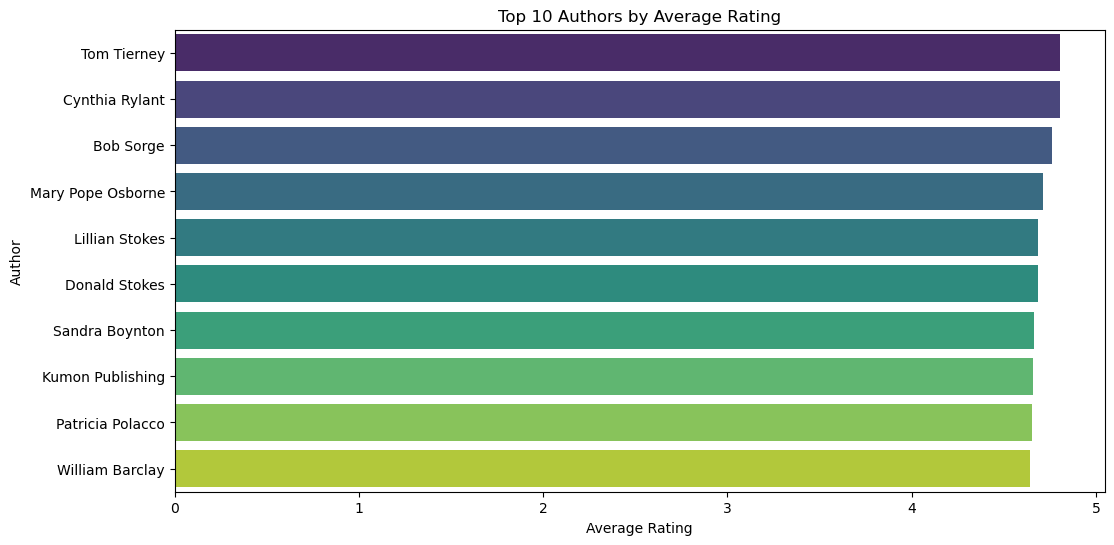

In [80]:
import seaborn as sns

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x='Average_Rating', y='Author', data=df_ratings_authors.head(10), palette='viridis')
plt.xlabel('Average Rating')
plt.title('Top 10 Authors by Average Rating')
plt.show()


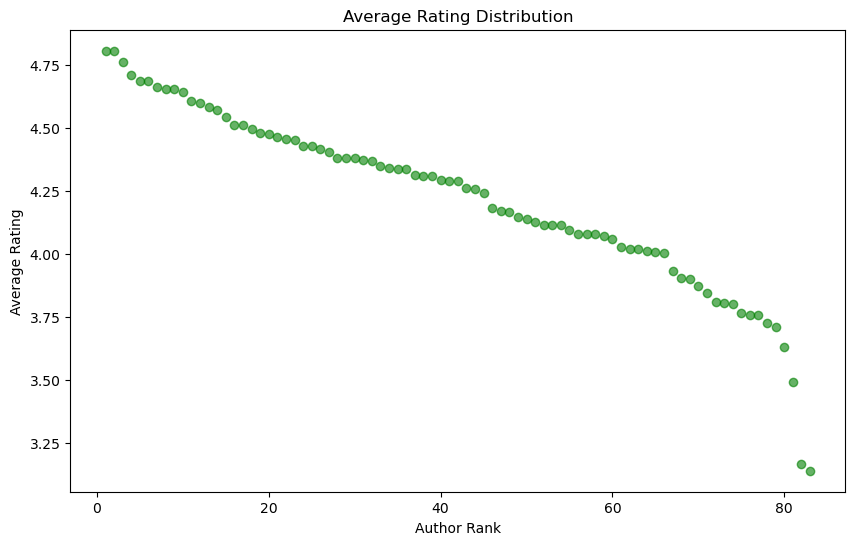

In [81]:
# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(df_ratings_authors.index, df_ratings_authors['Average_Rating'], color='green', alpha=0.6)
plt.xlabel('Author Rank')
plt.ylabel('Average Rating')
plt.title('Average Rating Distribution')
plt.show()


### Book Recommendation With pandas

In [21]:
file_path1 = r"C:\Users\abdel\Downloads\books_data.csv\books_data.csv"
file_path2 = r"C:\Users\abdel\Downloads\BigData_Project\Sales_Data\Books_rating.csv"
books  = pd.read_csv(file_path1)
ratings  = pd.read_csv(file_path2)

In [22]:
books.shape,ratings.shape

((212404, 10), (3000000, 10))

In [24]:
# Check the column names in your DataFrame
print(ratings.columns)

# Assuming the column names are as follows:
# 'Id', 'User_id', 'review/score', 'Title'

# Update the column names using correct casing and spacing if needed
ratings = ratings[['Id', 'User_id', 'review/score', 'Title']]

# Now you can use the updated DataFrame for further analysis or visualization


Index(['Id', 'Title', 'Price', 'User_id', 'profileName', 'review/helpfulness',
       'review/score', 'review/time', 'review/summary', 'review/text'],
      dtype='object')


In [25]:
ratings.rename(columns={'Id':'book_id','User_id':'user_id','review/score':'rating','Title':'title'},inplace=True)

In [26]:
ratings.head(2)

book_id         user_id  rating                           title
0  1882931173   AVCGYZL8FQQTD     4.0  Its Only Art If Its Well Hung!
1  0826414346  A30TK6U7DNS82R     5.0        Dr. Seuss: American Icon

#### 1. Books with most ratings

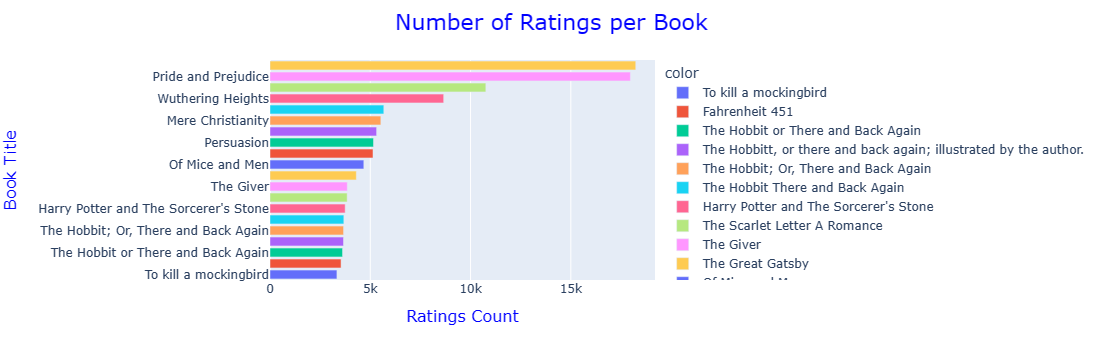

In [66]:
import pandas as pd
import plotly.express as px
# Calculate the number of user ratings per book and sort by ascending order
ratings_per_book = ratings.groupby('title')['user_id'].count().sort_values()

# Create a horizontal bar chart with the last(top) 20 book titles and their user counts
fig = px.bar(x=ratings_per_book.values[-20:], y=ratings_per_book.index[-20:], orientation='h',
             color=ratings_per_book.index[-20:])

# Set the title and axis labels
fig.update_layout(title={'text': 'Number of Ratings per Book', 'font': {'size': 22, 'color': 'blue'}, 'x': 0.5},
                  xaxis_title={'text': 'Ratings Count', 'font': {'size': 16, 'color': 'blue'}},
                  yaxis_title={'text': 'Book Title', 'font': {'size': 16, 'color': 'blue'}})

# Show the bar chart
fig.show()

### 2. Books with highest average rating

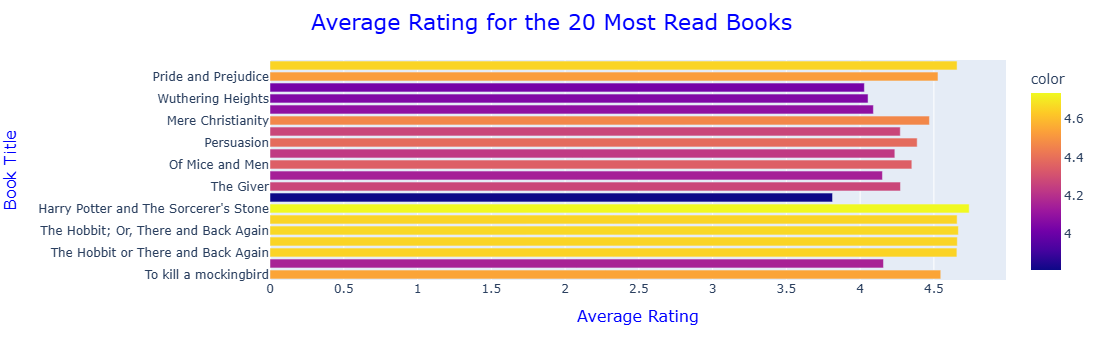

In [67]:
# Group the ratings data by book title and calculate the average review score
average_ratings = ratings.groupby('title')['rating'].mean()

# Get the column names
df = average_ratings.to_frame()
df["num_ratings"] = ratings_per_book

# Sort the books based on the number of ratings in descending order
sorted_books = df.sort_values(by=['num_ratings'], ascending=False)

# Subset the average ratings DataFrame for the top 20 books
average_ratings_top_20 = average_ratings.loc[ratings_per_book.index[-20:]]

# Create a horizontal bar chart for the average ratings
fig = px.bar(x=average_ratings_top_20.values, y=average_ratings_top_20.index, orientation='h',
             color=average_ratings_top_20.values)

# Set the title and axis labels
fig.update_layout(
    title={'text': 'Average Rating for the 20 Most Read Books', 'font': {'size': 22, 'color': 'blue'}, 'x': 0.5},
    xaxis_title={'text': 'Average Rating', 'font': {'size': 16, 'color': 'blue'}},
    yaxis_title={'text': 'Book Title', 'font': {'size': 16, 'color': 'blue'}})

# Show the bar chart
fig.show()

> Calculating the number of ratings in of each book

In [7]:
num_rating_df = ratings.groupby('title').count()['rating'].reset_index()
num_rating_df.rename(columns={'rating':'num_rating'},inplace=True)
num_rating_df.head()

title  num_rating
0           " Film technique, " and, " Film acting "           2
1  " We'll Always Have Paris": The Definitive Gui...           2
2  "... And Poetry is Born ..." Russian Classical...           1
3       "A Titanic hero" Thomas Andrews, shipbuilder           8
4  "A Truthful Impression of the Country": Britis...           1

> Filtering the data on the basis of users and books

In [28]:
x = ratings.groupby('user_id').count()['rating'] > 200
considerable_users = x[x].index

In [29]:
filtered_rating = ratings[ratings['user_id'].isin(considerable_users)]

In [30]:
filtered_rating

book_id         user_id  rating  \
1        0826414346  A30TK6U7DNS82R     5.0   
6        0826414346  A14OJS0VWMOSWO     5.0   
59       0963923080  A3NIQK6ZLYEP1L     4.0   
140      0789480662  A281NPSIMI1C2R     5.0   
176      1884734766  A14OJS0VWMOSWO     5.0   
...             ...             ...     ...   
2999935  0786182431  A2CR57GAJKNWVV     4.0   
2999937  0786182431  A1I2O9Y3X3HXLS     5.0   
2999949  0786182431     AFVQZQ8PW0L     5.0   
2999960  0679417052   A9Q28YTLYREO7     5.0   
2999979  B00085PL4C  A32ZKBXJJ45BRY     3.0   

                                                     title  
1                                 Dr. Seuss: American Icon  
6                                 Dr. Seuss: American Icon  
59       Rising Sons and Daughters: Life Among Japan's ...  
140                      Eyewitness Travel Guide to Europe  
176      Dealing With Disappointment: Helping Kids Cope...  
...                                                    ...  
2999935                   Very Bad Deaths: Library Edition  
2999937                   Very Bad Deaths: Library Edition  
2999949                   Very Bad Deaths: Library Edition  
2999960                                            My Life  
2999979           Old Quebec,: The fortress of New France,  

[134882 rows x 4 columns]

In [31]:
y = filtered_rating.groupby('title').count()['rating']>=50
famous_books = y[y].index

In [32]:
final_ratings = filtered_rating[filtered_rating['title'].isin(famous_books)]
final_ratings

book_id         user_id  rating                         title
1747     B000N6DDJQ   AUM3YMZ0YRJE0     5.0  The Scarlet Letter A Romance
1807     B000N6DDJQ   AMKZHBOK7VMQR     5.0  The Scarlet Letter A Romance
1820     B000N6DDJQ   AWLFVCT9128JV     4.0  The Scarlet Letter A Romance
1829     B000N6DDJQ   ABN5K7K1TM1QA     5.0  The Scarlet Letter A Romance
1830     B000N6DDJQ  A3IKBHODOTYYHM     4.0  The Scarlet Letter A Romance
...             ...             ...     ...                           ...
2999633  B000P91JYW  A1D2C0WDCSHUWZ     5.0                     Jane Eyre
2999638  B000P91JYW   AHUT55E980RDR     4.0                     Jane Eyre
2999641  B000P91JYW  A1T17LMQABMBN5     5.0                     Jane Eyre
2999646  B000P91JYW   AJQ1S39GZBKUG     5.0                     Jane Eyre
2999664  B000P91JYW   AQCQ5F0OJXMG9     5.0                     Jane Eyre

[17115 rows x 4 columns]

In [34]:
y = filtered_rating.groupby('title').count()['rating']>=50
famous_books = y[y].index

In [35]:
final_ratings = filtered_rating[filtered_rating['title'].isin(famous_books)]

In [36]:
final_ratings

book_id         user_id  rating                         title
1747     B000N6DDJQ   AUM3YMZ0YRJE0     5.0  The Scarlet Letter A Romance
1807     B000N6DDJQ   AMKZHBOK7VMQR     5.0  The Scarlet Letter A Romance
1820     B000N6DDJQ   AWLFVCT9128JV     4.0  The Scarlet Letter A Romance
1829     B000N6DDJQ   ABN5K7K1TM1QA     5.0  The Scarlet Letter A Romance
1830     B000N6DDJQ  A3IKBHODOTYYHM     4.0  The Scarlet Letter A Romance
...             ...             ...     ...                           ...
2999633  B000P91JYW  A1D2C0WDCSHUWZ     5.0                     Jane Eyre
2999638  B000P91JYW   AHUT55E980RDR     4.0                     Jane Eyre
2999641  B000P91JYW  A1T17LMQABMBN5     5.0                     Jane Eyre
2999646  B000P91JYW   AJQ1S39GZBKUG     5.0                     Jane Eyre
2999664  B000P91JYW   AQCQ5F0OJXMG9     5.0                     Jane Eyre

[17115 rows x 4 columns]

In [37]:
# saving the final dataset
final_ratings.to_csv('final_ratings.csv',index=False)

In [41]:
file_path = r"C:\Users\abdel\final_ratings.csv"
final_df = pd.read_csv(file_path)

In [42]:
final_df.head()

book_id         user_id  rating                         title
0  B000N6DDJQ   AUM3YMZ0YRJE0     5.0  The Scarlet Letter A Romance
1  B000N6DDJQ   AMKZHBOK7VMQR     5.0  The Scarlet Letter A Romance
2  B000N6DDJQ   AWLFVCT9128JV     4.0  The Scarlet Letter A Romance
3  B000N6DDJQ   ABN5K7K1TM1QA     5.0  The Scarlet Letter A Romance
4  B000N6DDJQ  A3IKBHODOTYYHM     4.0  The Scarlet Letter A Romance

### Creating the Pivot Table

In [44]:
### pivot tables provide a flexible and powerful way to analyze data, allowing you to quickly gain insights and make informed decisions.
pt = final_df.pivot_table(index='user_id',columns='title',values='rating')
pt

title           1984  A Christmas Carol (Classic Fiction)  \
user_id                                                     
A106016KSI0YQ    NaN                                  NaN   
A10T0OW97SFBB    NaN                                  NaN   
A114YQ7ZT9Y1W5   NaN                                  NaN   
A11DCTGTPS7M0C   NaN                                  NaN   
A126KX6FVI4T66   NaN                                  NaN   
...              ...                                  ...   
AV74NYPSKHXBU    4.0                                  NaN   
AWLFVCT9128JV    5.0                                  NaN   
AX54G5AL870Q8    NaN                                  NaN   
AXSH6O4OP5L4M    NaN                                  NaN   
AYT4FJYVCHYLE    NaN                                  NaN   

title           A Connecticut Yankee in King Arthur's Court  \
user_id                                                       
A106016KSI0YQ                                           NaN   
A10T0OW97SFBB                                           NaN   
A114YQ7ZT9Y1W5                                          NaN   
A11DCTGTPS7M0C                                          NaN   
A126KX6FVI4T66                                          NaN   
...                                                     ...   
AV74NYPSKHXBU                                           5.0   
AWLFVCT9128JV                                           NaN   
AX54G5AL870Q8                                           NaN   
AXSH6O4OP5L4M                                           NaN   
AYT4FJYVCHYLE                                           NaN   

title           A Farewell to Arms  A Fine Balance  \
user_id                                              
A106016KSI0YQ                  NaN             NaN   
A10T0OW97SFBB                  NaN             NaN   
A114YQ7ZT9Y1W5                 NaN             NaN   
A11DCTGTPS7M0C                 4.0             NaN   
A126KX6FVI4T66                 NaN             NaN   
...                            ...             ...   
AV74NYPSKHXBU                  NaN             NaN   
AWLFVCT9128JV                  NaN             NaN   
AX54G5AL870Q8                  NaN             5.0   
AXSH6O4OP5L4M                  NaN             NaN   
AYT4FJYVCHYLE                  NaN             4.0   

title           A Journey to the Center of the Earth  \
user_id                                                
A106016KSI0YQ                                    NaN   
A10T0OW97SFBB                                    NaN   
A114YQ7ZT9Y1W5                                   NaN   
A11DCTGTPS7M0C                                   NaN   
A126KX6FVI4T66                                   NaN   
...                                              ...   
AV74NYPSKHXBU                                    NaN   
AWLFVCT9128JV                                    NaN   
AX54G5AL870Q8                                    NaN   
AXSH6O4OP5L4M                                    NaN   
AYT4FJYVCHYLE                                    NaN   

title           A Portrait of the Artist As a Young Man  \
user_id                                                   
A106016KSI0YQ                                       NaN   
A10T0OW97SFBB                                       NaN   
A114YQ7ZT9Y1W5                                      NaN   
A11DCTGTPS7M0C                                      NaN   
A126KX6FVI4T66                                      NaN   
...                                                 ...   
AV74NYPSKHXBU                                       NaN   
AWLFVCT9128JV                                       NaN   
AX54G5AL870Q8                                       NaN   
AXSH6O4OP5L4M                                       NaN   
AYT4FJYVCHYLE                                       NaN   

title           A Portrait of the Artist as a Young Man  A Princess of Mars  \
user_id                                                                       
A106016KSI0YQ               

In [46]:
pt.fillna(0,inplace=True)
pt

title           1984  A Christmas Carol (Classic Fiction)  \
user_id                                                     
A106016KSI0YQ    0.0                                  0.0   
A10T0OW97SFBB    0.0                                  0.0   
A114YQ7ZT9Y1W5   0.0                                  0.0   
A11DCTGTPS7M0C   0.0                                  0.0   
A126KX6FVI4T66   0.0                                  0.0   
...              ...                                  ...   
AV74NYPSKHXBU    4.0                                  0.0   
AWLFVCT9128JV    5.0                                  0.0   
AX54G5AL870Q8    0.0                                  0.0   
AXSH6O4OP5L4M    0.0                                  0.0   
AYT4FJYVCHYLE    0.0                                  0.0   

title           A Connecticut Yankee in King Arthur's Court  \
user_id                                                       
A106016KSI0YQ                                           0.0   
A10T0OW97SFBB                                           0.0   
A114YQ7ZT9Y1W5                                          0.0   
A11DCTGTPS7M0C                                          0.0   
A126KX6FVI4T66                                          0.0   
...                                                     ...   
AV74NYPSKHXBU                                           5.0   
AWLFVCT9128JV                                           0.0   
AX54G5AL870Q8                                           0.0   
AXSH6O4OP5L4M                                           0.0   
AYT4FJYVCHYLE                                           0.0   

title           A Farewell to Arms  A Fine Balance  \
user_id                                              
A106016KSI0YQ                  0.0             0.0   
A10T0OW97SFBB                  0.0             0.0   
A114YQ7ZT9Y1W5                 0.0             0.0   
A11DCTGTPS7M0C                 4.0             0.0   
A126KX6FVI4T66                 0.0             0.0   
...                            ...             ...   
AV74NYPSKHXBU                  0.0             0.0   
AWLFVCT9128JV                  0.0             0.0   
AX54G5AL870Q8                  0.0             5.0   
AXSH6O4OP5L4M                  0.0             0.0   
AYT4FJYVCHYLE                  0.0             4.0   

title           A Journey to the Center of the Earth  \
user_id                                                
A106016KSI0YQ                                    0.0   
A10T0OW97SFBB                                    0.0   
A114YQ7ZT9Y1W5                                   0.0   
A11DCTGTPS7M0C                                   0.0   
A126KX6FVI4T66                                   0.0   
...                                              ...   
AV74NYPSKHXBU                                    0.0   
AWLFVCT9128JV                                    0.0   
AX54G5AL870Q8                                    0.0   
AXSH6O4OP5L4M                                    0.0   
AYT4FJYVCHYLE                                    0.0   

title           A Portrait of the Artist As a Young Man  \
user_id                                                   
A106016KSI0YQ                                       0.0   
A10T0OW97SFBB                                       0.0   
A114YQ7ZT9Y1W5                                      0.0   
A11DCTGTPS7M0C                                      0.0   
A126KX6FVI4T66                                      0.0   
...                                                 ...   
AV74NYPSKHXBU                                       0.0   
AWLFVCT9128JV                                       0.0   
AX54G5AL870Q8                                       0.0   
AXSH6O4OP5L4M                                       0.0   
AYT4FJYVCHYLE                                       0.0   

title           A Portrait of the Artist as a Young Man  A Princess of Mars  \
user_id                                                                       
A106016KSI0YQ               

### Finding the Simlarities among the users

In [47]:
from sklearn.metrics.pairwise import cosine_similarity

In [48]:
similarity_scores = cosine_similarity(pt)

In [49]:
similarity_scores

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.07151985, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.07151985, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.22086305,
        0.18586518],
       [0.        , 0.        , 0.        , ..., 0.22086305, 1.        ,
        0.42077019],
       [0.        , 0.        , 0.        , ..., 0.18586518, 0.42077019,
        1.        ]])

In [50]:
similarity_scores.shape

(298, 298)

In [51]:
np.where(pt.index=='A106016KSI0YQ')[0][0]

0

In [52]:
sorted(list(enumerate(similarity_scores[0])),key=lambda x:x[1],reverse=True)[1:6]

[(290, 1.0),
 (57, 0.37796447300922725),
 (5, 0.25683274846875703),
 (138, 0.24514516892273006),
 (212, 0.23211917272131485)]

In [53]:
pt.index[290]

'AUHG8KSHI529U'

In [54]:
df = ratings[ratings['user_id'] == pt.index[290]].sort_values(by='rating',ascending=False)
# lt = list(df[df["review/score"].isin([4.0,5.0])].head()['Title'])
# lt
df.shape

(298, 4)

In [57]:
user_books_lst = list(ratings[ratings['user_id'] == pt.index[0]]['title'])
df = df[~df['title'].isin(user_books_lst)]
df = df[df['rating'].isin([4.0,5.0])]
lst = list(df.head()['title'])

In [58]:
data = []
data.extend(lst)

In [59]:
data.extend(['Jungle Book'])
data


['Consilience (University Press Audiobooks)',
 'The New Americans: How the Melting Pot Can Work Again',
 'Beethoven (Oxford paperbacks)',
 'Counterpoint',
 "Shakespeare's Macbeth; (Macmillan's English classics)",
 'Jungle Book']

#### Function to recommend Books to a user

In [60]:
def recommend(user_id):
    # index fetch
    index = np.where(pt.index==user_id)[0][0]
    similar_items = sorted(list(enumerate(similarity_scores[index])),key=lambda x:x[1],reverse=True)[1:4]
    
    data = []
    for i in similar_items:
        df = ratings[ratings['user_id'] == pt.index[i[0]]].sort_values(by='rating',ascending=False)
        user_books_lst = list(ratings[ratings['user_id'] == pt.index[index]]['title'])
        df = df[~df['title'].isin(user_books_lst)]
        df = df[df['rating'].isin([4.0,5.0])]
        data.extend(list(df.head()['title']))
        data = [*set(data)]
    return data

In [61]:
recommend('A106016KSI0YQ')

['Consilience (University Press Audiobooks)',
 'SPACE, TIME AND ARCHITECTURE: THE GROWTH OF A NEW TRADITION.',
 'The New Americans: How the Melting Pot Can Work Again',
 'Small-Circle Jujitsu',
 "Shakespeare's Macbeth; (Macmillan's English classics)",
 'A striving after wind',
 'Sea Wolf',
 'Taiji Chin Na: The Seizing Art of Taijiquan (Chinese Internal Martial Arts)',
 'Beethoven (Oxford paperbacks)',
 'The Rebel',
 'House of the Sleeping Beauties',
 'The Scarlet Letter A Romance',
 'All quiet on the western front;',
 'Counterpoint',
 'A Case Of Conscience']

In [62]:
recommend('AX54G5AL870Q8')

['In a Dark House (Crombie, Deborah)',
 'Pajama Time!',
 'Winter Solstice',
 "The Fort at River's Bend: The Sorcerer, Book 1 (The Camulod Chronicles, Book 5)",
 'Cotillion',
 'Snuggle Puppy!',
 "All the King's Men",
 'The Nature of Water and Air',
 'The Attack',
 "Myron's Magic Cow",
 'Long Spoon Lane (Charlotte & Thomas Pitt Novels)',
 'The Dragon Machine',
 'Tough Boris',
 "Tomorrow's Alphabet",
 'THE DOLLMAKER']

In [63]:
recommend('AXSH6O4OP5L4M')

['Quincey Morris, Vampire',
 'A Time to Kill (John Grisham)',
 'Two treatises of government',
 'Fear No Evil [FEAR NO EVIL] [Mass Market Paperback]',
 'Last Hero',
 'Dangerous Kiss',
 'Hogfather (Discworld)',
 'Brain',
 'A Clockwork Orange',
 "Prodigal Son (Dean Koontz's Frankenstein, Book 1)",
 'Baseball Prospectus: 2001 Edition',
 'One, two, three ... infinity: Facts & speculations of science',
 'Insect (DK Eyewitness Books)',
 'Death of a peer (The Best mysteries of all time)',
 'Green City in the Sun']